# Neyman Orthogonality proof

To demonstrate why the derivative of 𝛼 with respect to 𝜂 is zero under the Neyman Orthogonality condition, you must show that the objective function's sensitivity to 𝜂 at the true parameter values is minimal. Here’s a simplified approach:

1. Objective Function: Consider a generic objective function 𝐿(𝛼,𝜂) that you minimize to estimate parameters. Suppose 𝐿 represents a loss function for the model 𝑦=𝛼𝐷+𝑏′𝑊+𝑒.

2. Gradient with Respect to 𝜂η: • Compute the gradient ∇𝜂𝐿(𝛼,𝜂). For Neyman Orthogonality to hold, this gradient evaluated at the true parameter values (𝛼,𝜂0) must be zero, i.e., ∇𝜂𝐿(𝛼,𝜂0)=0. • This implies that at the optimum, small changes in 𝜂(nuisance parameters) do not affect the value of the loss function, indicating that the estimation of 𝛼α is stable against changes in 𝜂.

3. Second Derivative or Cross-Derivative: • Calculate ∂2𝐿/∂𝛼∂𝜂. For the derivative 𝑑𝛼/𝑑𝜂 to be zero, this cross-derivative should also ideally be zero at the optimum. • It means that the rate of change of the loss function with respect to 𝛼α does not change as 𝜂 changes slightly, confirming the insensitivity of 𝛼 to 𝜂.

4. Implicit Function Theorem: • The theorem suggests that if 𝐹(𝛼,𝜂)=∇𝜂𝐿(𝛼,𝜂) and ∂𝐹∂𝜂 are well-defined and continuous, then around the true values, the function 𝛼(𝜂) behaves smoothly and does not react to minor perturbations in 𝜂.

5. Practical Consideration: In practice, you often verify this condition through simulation or empirical testing, especially in complex econometric models where analytical solutions may be infeasible.

# Code section

## Orthogonal Learning

In [25]:
!pip install multiprocess
!pip install pyreadr
!git clone https://github.com/maxhuppertz/hdmpy.git
import warnings
import hdmpy
import numpy as np
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

fatal: destination path 'hdmpy' already exists and is not an empty directory.


In [33]:
# Set seed
np.random.seed(0)
B = 100
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [34]:
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 # We reshape because in r when we sum a vecto with a matrix it sum by column

    # DGP
    Y = 10*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients

In [35]:

r_lasso_estimation.est

{'coefficients':                      0
 (Intercept)   0.033276
 V1           11.031206
 V2            0.000000
 V3            0.000000
 V4            0.000000
 ...                ...
 V97           0.000000
 V98           0.000000
 V99           0.000000
 V100          0.000000
 V101          0.000000
 
 [102 rows x 1 columns],
 'beta':               0
 V1    11.031206
 V2     0.000000
 V3     0.000000
 V4     0.000000
 V5     0.000000
 ...         ...
 V97    0.000000
 V98    0.000000
 V99    0.000000
 V100   0.000000
 V101   0.000000
 
 [101 rows x 1 columns],
 'intercept': 0    0.033276
 dtype: float64,
 'index':           0
 V1     True
 V2    False
 V3    False
 V4    False
 V5    False
 ...     ...
 V97   False
 V98   False
 V99   False
 V100  False
 V101  False
 
 [101 rows x 1 columns],
 'lambda':                0
 V1    102.820591
 V2     94.775260
 V3     89.717231
 V4    104.692840
 V5     76.701766
 ...          ...
 V97    93.959213
 V98    86.241576
 V99    78.501904
 V1

In [36]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 # We reshape because in r when we sum a vecto with a matrix it sum by column

    # DGP
    Y = 10*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 :
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ]

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient

    # Regress residuals.
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

In [37]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]

Text(0.5, 0, 'Naive - True')

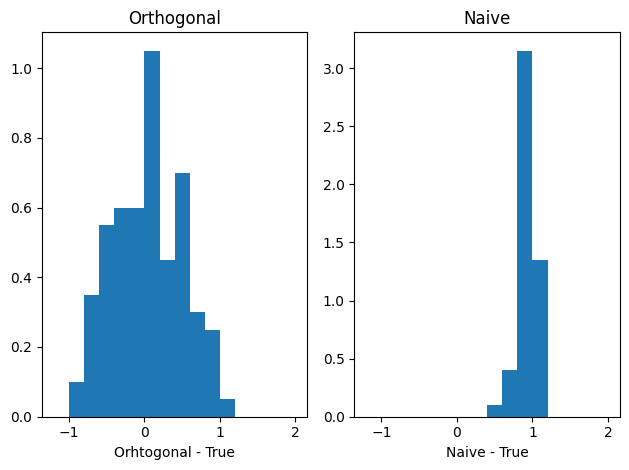

In [38]:
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 10 , range = (-2, 2), density = True , bins = Orto_breaks )
axs[1].hist( Naive - 10, range = (-2, 2), density = True , bins = Naive_breaks )

axs[0].title.set_text('Orthogonal (100 trials)')
axs[1].title.set_text('Naive (100 trials)')

axs[0].set_xlabel( 'Orhtogonal - True' )
axs[1].set_xlabel( 'Naive - True' )

With B=1000

In [39]:
# Set seed
np.random.seed(0)
B = 1000
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [41]:
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 # We reshape because in r when we sum a vecto with a matrix it sum by column

    # DGP
    Y = 10*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients

In [42]:
r_lasso_estimation.est

{'coefficients':                      0
 (Intercept)   0.033276
 V1           11.031206
 V2            0.000000
 V3            0.000000
 V4            0.000000
 ...                ...
 V97           0.000000
 V98           0.000000
 V99           0.000000
 V100          0.000000
 V101          0.000000
 
 [102 rows x 1 columns],
 'beta':               0
 V1    11.031206
 V2     0.000000
 V3     0.000000
 V4     0.000000
 V5     0.000000
 ...         ...
 V97    0.000000
 V98    0.000000
 V99    0.000000
 V100   0.000000
 V101   0.000000
 
 [101 rows x 1 columns],
 'intercept': 0    0.033276
 dtype: float64,
 'index':           0
 V1     True
 V2    False
 V3    False
 V4    False
 V5    False
 ...     ...
 V97   False
 V98   False
 V99   False
 V100  False
 V101  False
 
 [101 rows x 1 columns],
 'lambda':                0
 V1    102.820591
 V2     94.775260
 V3     89.717231
 V4    104.692840
 V5     76.701766
 ...          ...
 V97    93.959213
 V98    86.241576
 V99    78.501904
 V1

In [43]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 # We reshape because in r when we sum a vecto with a matrix it sum by column

    # DGP
    Y = 10*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 :
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ]

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient

    # Regress residuals.
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

In [44]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]

Text(0.5, 0, 'Naive - True')

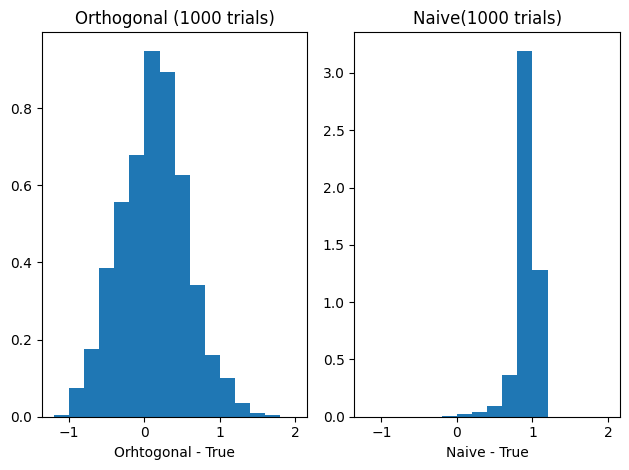

In [45]:
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 10 , range = (-2, 2), density = True , bins = Orto_breaks )
axs[1].hist( Naive - 10, range = (-2, 2), density = True , bins = Naive_breaks )

axs[0].title.set_text('Orthogonal (1000 trials)')
axs[1].title.set_text('Naive(1000 trials)')

axs[0].set_xlabel( 'Orhtogonal - True' )
axs[1].set_xlabel( 'Naive - True' )

With B=10000

In [46]:
# Set seed
np.random.seed(0)
B = 10000
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [47]:
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 # We reshape because in r when we sum a vecto with a matrix it sum by column

    # DGP
    Y = 10*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients

In [48]:
r_lasso_estimation.est

{'coefficients':                      0
 (Intercept)   0.033276
 V1           11.031206
 V2            0.000000
 V3            0.000000
 V4            0.000000
 ...                ...
 V97           0.000000
 V98           0.000000
 V99           0.000000
 V100          0.000000
 V101          0.000000
 
 [102 rows x 1 columns],
 'beta':               0
 V1    11.031206
 V2     0.000000
 V3     0.000000
 V4     0.000000
 V5     0.000000
 ...         ...
 V97    0.000000
 V98    0.000000
 V99    0.000000
 V100   0.000000
 V101   0.000000
 
 [101 rows x 1 columns],
 'intercept': 0    0.033276
 dtype: float64,
 'index':           0
 V1     True
 V2    False
 V3    False
 V4    False
 V5    False
 ...     ...
 V97   False
 V98   False
 V99   False
 V100  False
 V101  False
 
 [101 rows x 1 columns],
 'lambda':                0
 V1    102.820591
 V2     94.775260
 V3     89.717231
 V4    104.692840
 V5     76.701766
 ...          ...
 V97    93.959213
 V98    86.241576
 V99    78.501904
 V1

In [49]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 # We reshape because in r when we sum a vecto with a matrix it sum by column

    # DGP
    Y = 10*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 :
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ]

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient

    # Regress residuals.
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

In [50]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]

Text(0.5, 0, 'Naive - True')

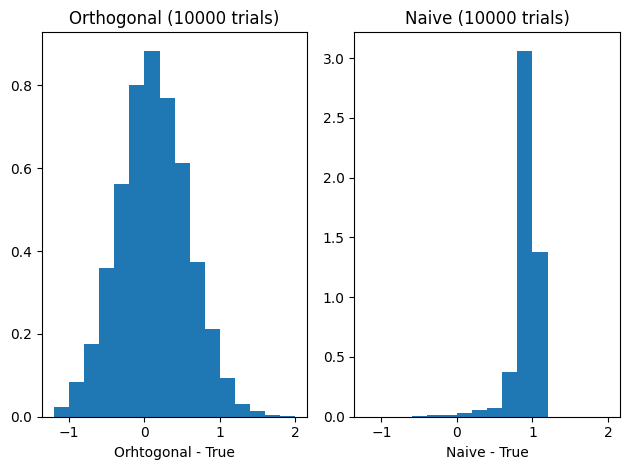

In [51]:
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 10 , range = (-2, 2), density = True , bins = Orto_breaks )
axs[1].hist( Naive - 10, range = (-2, 2), density = True , bins = Naive_breaks )

axs[0].title.set_text('Orthogonal (10000 trials)')
axs[1].title.set_text('Naive (10000 trials)')

axs[0].set_xlabel( 'Orhtogonal - True' )
axs[1].set_xlabel( 'Naive - True' )

2h 57 min 58 s

We observe that in the orthogonal histograms if we increase more trials the mean is getting more centered on 0 (Law of big numbers) and the distribution resembles a bell curve (TLC) . While the naive histograms seems to be getting more centered at the value of 1 this could respond to a biased estimation and slow convergence

# Implementing parallel computing

In [54]:
from multiprocessing import Pool
import time

In [55]:
def process_iteration(_):
    n = 100
    p = 100
    beta = (1 / (np.arange(1, p + 1) ** 2)).reshape(p, 1)
    gamma = (1 / (np.arange(1, p + 1) ** 2)).reshape(p, 1)

    mean = 0
    sd = 1
    X = np.random.normal(mean, sd, n * p).reshape(n, p)

    D = (X @ gamma) + np.random.normal(mean, sd, n).reshape(n, 1) / 4

    Y = 10 * D + (X @ beta) + np.random.normal(mean, sd, n).reshape(n, 1)

    r_lasso_estimation = hdmpy.rlasso(np.concatenate((D, X), axis=1), Y, post=True)

    coef_array = r_lasso_estimation.est['coefficients'].iloc[2:, :].to_numpy()

    SX_IDs = np.where(coef_array != 0)[0]

    if sum(SX_IDs) == 0:
        return sm.OLS(Y, sm.add_constant(D)).fit().summary2().tables[1].round(3).iloc[1, 0]
    elif sum(SX_IDs) > 0:
        X_D = np.concatenate((D, X[:, SX_IDs]), axis=1)
        return sm.OLS(Y, sm.add_constant(X_D)).fit().summary2().tables[1].round(3).iloc[1, 0]

def compute_parallel(B):
    start_time = time.time()
    with Pool() as pool:
        results = pool.map(process_iteration, range(B))
    end_time = time.time()
    total_time = end_time - start_time
    print(f"Parallel computation time: {total_time:.2f} seconds")
    return results

if __name__ == "__main__":
    np.random.seed(0)
    B = 100
    Naive = np.zeros(B)
    Orthogonal = np.zeros(B)
    results = compute_parallel(B)
    for i, result in enumerate(results):
        Naive[i] = result
        n = 100
        p = 100
        beta = (1 / (np.arange(1, p + 1) ** 2)).reshape(p, 1)
        gamma = (1 / (np.arange(1, p + 1) ** 2)).reshape(p, 1)

        mean = 0
        sd = 1
        X = np.random.normal(mean, sd, n * p).reshape(n, p)

        D = (X @ gamma) + np.random.normal(mean, sd, n).reshape(n, 1) / 4

        Y = 10 * D + (X @ beta) + np.random.normal(mean, sd, n).reshape(n, 1)

        resY = hdmpy.rlasso(X, Y, post=False).est['residuals']
        resD = hdmpy.rlasso(X, D, post=False).est['residuals']
        Orthogonal[i] = sm.OLS(resY, sm.add_constant(resD)).fit().summary2().tables[1].round(3).iloc[1, 0]




Parallel computation time: 45.38 seconds


In [56]:
np.random.seed(0)
B = 100
Naive = np.zeros(B)
Orthogonal = np.zeros(B)

start_time = time.time()

In [57]:
for i in range(B):
    n = 100
    p = 100
    beta = (1 / (np.arange(1, p + 1) ** 2)).reshape(p, 1)
    gamma = (1 / (np.arange(1, p + 1) ** 2)).reshape(p, 1)

    mean = 0
    sd = 1
    X = np.random.normal(mean, sd, n * p).reshape(n, p)

    D = (X @ gamma) + np.random.normal(mean, sd, n).reshape(n, 1) / 4

    Y = 10 * D + (X @ beta) + np.random.normal(mean, sd, n).reshape(n, 1)

    r_lasso_estimation = hdmpy.rlasso(np.concatenate((D, X), axis=1), Y, post=True)

    coef_array = r_lasso_estimation.est['coefficients'].iloc[2:, :].to_numpy()

    SX_IDs = np.where(coef_array != 0)[0]

    if sum(SX_IDs) == 0:
        Naive[i] = sm.OLS(Y, sm.add_constant(D)).fit().summary2().tables[1].round(3).iloc[1, 0]
    elif sum(SX_IDs) > 0:
        X_D = np.concatenate((D, X[:, SX_IDs]), axis=1)
        Naive[i] = sm.OLS(Y, sm.add_constant(X_D)).fit().summary2().tables[1].round(3).iloc[1, 0]

    resY = hdmpy.rlasso(X, Y, post=False).est['residuals']
    resD = hdmpy.rlasso(X, D, post=False).est['residuals']
    Orthogonal[i] = sm.OLS(resY, sm.add_constant(resD)).fit().summary2().tables[1].round(3).iloc[1, 0]

end_time = time.time()
total_time = end_time - start_time
print(f"Non-parallel computation time: {total_time:.2f} seconds")

Non-parallel computation time: 112.10 seconds


# Double Lasso - Using School data

In [74]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("https://raw.githubusercontent.com/gsbDBI/ExperimentData/97a11199ba559f01c7b3803a1493ffa08631732e/School/bruhn2016.csv")
data.dropna(inplace=True)

In [75]:
# Assuming 'outcome.test.score' as the dependent variable
y = data['outcome.test.score']

# Use all other columns as independent variables, excluding the first column which typically is the index or ID
X = data.iloc[:, 1:]

# Standardize features
X_std = StandardScaler().fit_transform(X)

### OLS MODEL

In [82]:
X_ols = sm.add_constant(X)
ols_model = sm.OLS(y, X_ols).fit()
treatment_ols_coef = ols_model.params['treatment']
treatment_ols_ci_lower = treatment_ols_coef - 1.96 * ols_model.bse['treatment']
treatment_ols_ci_upper = treatment_ols_coef + 1.96 * ols_model.bse['treatment']

print("OLS Estimate:", treatment_ols_coef)

OLS Estimate: 4.290504687606638


### LASSO with Cross-Validation

In [83]:
lasso_model = make_pipeline(StandardScaler(), LassoCV(cv=10, random_state=0))
lasso_model.fit(X, y)
lasso_coef = lasso_model.named_steps['lassocv'].coef_[1]
print("Lasso CV Estimate:", lasso_coef)


Lasso CV Estimate: -0.4105894541900167


### Double Lasso Theoretical lambda

In [84]:
lasso_residuals = y - lasso_model.predict(X)
treatment_residuals = data['treatment'] - lasso_model.predict(X)
double_lasso_theoretical_coef = np.mean(lasso_residuals * treatment_residuals) / np.mean(treatment_residuals**2)
print("Double Lasso (Theoretical) Estimate:", double_lasso_theoretical_coef)

Double Lasso (Theoretical) Estimate: -4.948266877815712e-05


### Double Lasso (partialling out)

In [85]:
double_lasso_partial_out_coef = np.mean(lasso_residuals * data['treatment']) / np.mean(lasso_residuals**2)
print("Double Lasso (Partialling Out) Estimate:", double_lasso_partial_out_coef)


Double Lasso (Partialling Out) Estimate: 3.3865604375527165e-05


In [86]:
plot_data = pd.DataFrame({
    'Model': ["OLS", "Lasso CV", "Double Lasso Theoretical", "Double Lasso Partialling Out"],
    'Coefficient': [treatment_ols_coef, lasso_coef, double_lasso_theoretical_coef, double_lasso_partial_out_coef],
    'Lower': [treatment_ols_ci_lower, np.nan, np.nan, np.nan],
    'Upper': [treatment_ols_ci_upper, np.nan, np.nan, np.nan]
})



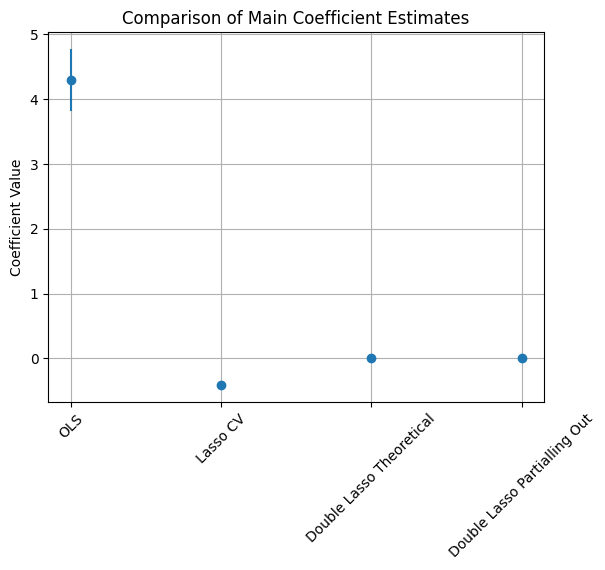

In [87]:
plt.errorbar(plot_data['Model'], plot_data['Coefficient'], yerr=[plot_data['Coefficient'] - plot_data['Lower'], plot_data['Upper'] - plot_data['Coefficient']], fmt='o')
plt.title('Comparison of Main Coefficient Estimates')
plt.xlabel('')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()